# 🧠 Appointment Prediction Project
**Goal**: Predict whether a lead will result in an appointment being set.

**Data Sources**:
- Lead Dataset (hashed phone, zip, user agent)
- Zip Code Statistics
- Infutor Data (hashed phone features)



## I. Exploratory Data Analysis

This part focuses on initial data exploration for the project. The goal is to understand the structure, distribution, quality, and potential predictive features in preparation for modeling.


## 1. Import Libraries and Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Visualization settings
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Show all rows
pd.set_option('display.max_rows', None)

# Optional: Show all columns too
pd.set_option('display.max_columns', None)

# Optional: Don't truncate column contents
pd.set_option('display.max_colwidth', None)


## 3. Load Data

Loads data from data/raw folders. Displays top rows for inspection

In [0]:
# Load CSV data from data/raw/ folder
data_path_leads = "/data/raw/leads_dataset.csv"
data_path_zip_code = "/data/raw/zip_code_dataset.csv"
data_path_infutor = "/data/raw/infutor_enrichment_dataset.csv" 

try:
    leads_df = pd.read_csv(data_path_leads, dtype={'ZIP_CODE': str})
    zip_code_df = pd.read_csv(data_path_zip_code, dtype={'ZIP_CODE': str})
    infutor_enrichment_df = pd.read_csv(data_path_infutor)
except OSError as e:
    print(f"Error reading file: {e}")

# Quick preview
display(leads_df.head())
display(zip_code_df.head())
display(infutor_enrichment_df.head())

HASHED_PHONE_NUMBER,IS_APPOINTMENT_SET,LEAD_CREATED_AT_UTC,ZIP_CODE,CITY,STATE,COUNTY,EMAIL_DOMAIN,OPERATINGSYSTEMCLASS,OPERATINGSYSTEMNAME,AGENTLANGUAGECODE,AGENTNAME,AGENTVERSIONMAJOR,DEVICEBRAND,DEVICEFIRMWAREVERSION,DEVICENAME,DEVICEVERSION,FACEBOOKDEVICECLASS,LAYOUTENGINENAME,NETWORKTYPE,OPERATINGSYSTEMVERSIONMAJOR,WEBVIEWAPPNAME
16bc446a779996bf3007065819f1dd4692a17d14,true,2023-07-18T15:11:55Z,61080,South Beloit,IL,Winnebago,gmail.com,Mobile,Android,null,Chrome Webview,114,Samsung,null,Samsung SM-A546V,null,null,Blink,Unknown,13,Newsbreak
6d30f0d0f87d39f8c178e3750072eef79bb9d7a0,false,2022-09-19T18:37:21Z,33914,Cape Coral,FL,Lee,gmail.com,Mobile,iOS,en-us,UIWebView,605,Apple,19G71,Apple iPhone,iPhone 13 Pro Max,phone,AppleWebKit,Unknown,15,Facebook App for iOS
9de207ef32d3696829ae369c2a9a4500cd36ec43,true,2022-11-09T21:38:10Z,42055,Kuttawa,KY,Lyon,gmail.com,Mobile,Android,null,Chrome Webview,105,Samsung,null,Samsung SM-G991U,null,null,Blink,Unknown,12,Facebook App for Android
31bb43ece722562df3a163ba94be4eb2ccd1bf71,false,2022-11-13T15:41:31Z,43701,Zanesville,OH,Muskingum,gmail.com,Mobile,iOS,en-us,UIWebView,605,Apple,19G82,Apple iPhone,iPhone 13,phone,AppleWebKit,Unknown,15,Facebook App for iOS
674de0e7b4da1c9945422b248f94cbf2499d59e2,false,2022-10-07T17:56:51Z,22206,Arlington,VA,Arlington,gmail.com,Mobile,iOS,en-us,UIWebView,605,Apple,20A380,Apple iPhone,iPhone XR,phone,AppleWebKit,Unknown,16,Facebook App for iOS


ZIP_CODE,Alchemist,Ancient Apparition,Anti-Mage,Axe,Batrider,Beastmaster,Chaos Knight,Chen,Clinkz,Clockwerk,Crystal Maiden,Dark Seer,Dazzle,Death Prophet,Doom,Dragon Knight,Drow Ranger,Earth Spirit,Earthshaker,Elder Titan,Ember Spirit,Enchantress,Enigma,Faceless Void,Pudge
47327,2065.0,1403.0,40.5,42.1,18.0,7.0,93.0,62.0,26.0,561.0,419.0,6.2,6.0,0.3,2.0,1081.0,840.0,16.0,14.0,25.0,12.0,76.0,83.0,3.0,1952.0
71268,347.0,257.0,40.6,40.6,17.0,7.0,93.0,62.0,34.0,697.0,506.0,6.0,6.0,0.3,2.0,1205.0,910.0,21.0,21.0,31.0,16.0,90.0,74.0,0.0,1991.0
27828,3581.0,2519.0,39.2,38.8,17.0,10.0,90.0,59.0,29.0,680.0,470.0,6.0,6.0,0.4,2.0,1533.0,1288.0,24.0,20.0,34.0,21.0,68.0,73.0,3.0,1990.0
30143,7863.0,5681.0,46.4,49.5,27.0,2.0,98.0,75.0,29.0,871.0,704.0,6.4,6.0,0.3,2.0,2654.0,2445.0,9.0,9.0,14.0,9.0,79.0,84.0,1.0,1994.0
25564,90.0,77.0,37.4,36.8,20.0,2.0,98.0,77.0,16.0,695.0,687.0,5.8,6.0,0.4,2.0,1545.0,1125.0,0.0,22.0,0.0,0.0,80.0,68.0,0.0,1987.0


Unnamed: 0,HASHED_PHONE_NUMBER,MATCHLEVEL,ATTRIBUTES_CONNEXSEGMENTATION_CT_HOMEIMPROVE12_ANY,ATTRIBUTES_CONNEXSEGMENTATION_CT_HOMEREMODEL12_ANY,ATTRIBUTES_COREDEMOGRAPHICS_DOB,ATTRIBUTES_COREDEMOGRAPHICS_GENDER,ATTRIBUTES_COREDEMOGRAPHICS_MARRIEDCD,ATTRIBUTES_COREDEMOGRAPHICS_WEALTHSCR,ATTRIBUTES_COREDEMOGRAPHICS_HOMEOWNERCD,ATTRIBUTES_COREDEMOGRAPHICS_EHI,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_FIREPLCD,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_POOL,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_CREDITCARD,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_HHNBRSR,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_YRBLD,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_LOR,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_HHNBR,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_CENS_POP_DENSITY,ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_FB,ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_INSTA,ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_LNKIN,ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_PINT,ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_TWITTER,ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_YOUTUBE,ATTRIBUTES_CONNEXSEGMENTATION_CT_STRMSUB_HULU,ATTRIBUTES_CONNEXSEGMENTATION_CT_STRMSUB_NETFLIX,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_DEALSEEK,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_OFFLINE,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_QUALSEEK,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_STRAITFWD,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_TRAD,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_INTERNET,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_MAGAZINE,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_NEWSPAPER,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_RADIO,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_TV
0,9a99e383ee68a51c2740de9883f5b1bee5d2a4da,1,null,Y,197010.0,M,M,A,H,J,null,null,Y,null,1959.0,6.0,2.0,3801.0,Y,null,null,Y,null,Y,Y,null,Y,Y,null,Y,null,Y,Y,null,Y,null
1,0020b0a911711b66c100d7e8e25e226783bb0072,5,null,null,194702.0,M,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2,d436912ed29db2950ca13b64cc56fefc0f581f7a,1,null,null,196410.0,F,M,E,H,I,null,null,Y,null,null,9.0,2.0,294.0,Y,null,Y,Y,Y,Y,null,Y,Y,Y,Y,null,null,Y,null,null,null,Y
3,c2bd44a987bc7b9663352235ea2b7bb04b696697,5,null,null,null,F,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
4,c363fb2c7bbdd728928716b4d5b4a80a13cbd2f2,1,null,null,197009.0,M,S,D,U,E,null,null,Y,null,null,15.0,2.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,Y,null


## 4. Basic Data Overview

Provides initial insights into the structure and quality of each dataset. For every data source, we examine:
- shape,
- data types,
- missing values

In [0]:
def initial_insights(df, name):
    print(f"--- {name} Dataset ---")
    print("Shape:", df.shape)
    print("\nData Types:")
    display(df.dtypes)
    
    print("\nMissing Values (NA + blanks):")
    display(df.isnull().sum()[df.isnull().sum() > 0])

   # print("\nDescriptive Statistics:") Fix object first
   # display(df.describe(include=["number", "object"]).transpose())

# Initial insights for each dataset
initial_insights(leads_df, "Leads")
initial_insights(zip_code_df, "Zip code")
initial_insights(infutor_enrichment_df, "Infutor enrichment")

--- Leads Dataset ---
Shape: (308960, 22)

Data Types:


HASHED_PHONE_NUMBER            object
IS_APPOINTMENT_SET             object
LEAD_CREATED_AT_UTC            object
ZIP_CODE                       object
CITY                           object
STATE                          object
COUNTY                         object
EMAIL_DOMAIN                   object
OPERATINGSYSTEMCLASS           object
OPERATINGSYSTEMNAME            object
AGENTLANGUAGECODE              object
AGENTNAME                      object
AGENTVERSIONMAJOR              object
DEVICEBRAND                    object
DEVICEFIRMWAREVERSION          object
DEVICENAME                     object
DEVICEVERSION                  object
FACEBOOKDEVICECLASS            object
LAYOUTENGINENAME               object
NETWORKTYPE                    object
OPERATINGSYSTEMVERSIONMAJOR    object
WEBVIEWAPPNAME                 object
dtype: object


Missing Values (NA + blanks):


IS_APPOINTMENT_SET               3101
LEAD_CREATED_AT_UTC              3101
ZIP_CODE                         3101
CITY                             3138
STATE                            3138
COUNTY                           3138
EMAIL_DOMAIN                     3101
OPERATINGSYSTEMCLASS             3118
OPERATINGSYSTEMNAME              3118
AGENTLANGUAGECODE              201271
AGENTNAME                        3118
AGENTVERSIONMAJOR                3118
DEVICEBRAND                      3118
DEVICEFIRMWAREVERSION          146081
DEVICENAME                       3118
DEVICEVERSION                  145820
FACEBOOKDEVICECLASS            219404
LAYOUTENGINENAME                 3118
NETWORKTYPE                      3118
OPERATINGSYSTEMVERSIONMAJOR      3118
WEBVIEWAPPNAME                   3118
dtype: int64

--- Zip code Dataset ---
Shape: (19692, 26)

Data Types:


ZIP_CODE               object
Alchemist             float64
Ancient Apparition    float64
Anti-Mage             float64
Axe                   float64
Batrider              float64
Beastmaster           float64
Chaos Knight          float64
Chen                  float64
Clinkz                float64
Clockwerk             float64
Crystal Maiden        float64
Dark Seer             float64
Dazzle                float64
Death Prophet         float64
Doom                  float64
Dragon Knight         float64
Drow Ranger           float64
Earth Spirit          float64
Earthshaker           float64
Elder Titan           float64
Ember Spirit          float64
Enchantress           float64
Enigma                float64
Faceless Void         float64
Pudge                 float64
dtype: object


Missing Values (NA + blanks):


ZIP_CODE              1
Alchemist             1
Ancient Apparition    1
Anti-Mage             1
Axe                   1
Batrider              1
Beastmaster           1
Chaos Knight          1
Chen                  1
Clinkz                1
Clockwerk             1
Crystal Maiden        1
Dark Seer             1
Dazzle                1
Death Prophet         1
Doom                  1
Dragon Knight         1
Drow Ranger           1
Earth Spirit          1
Earthshaker           1
Elder Titan           1
Ember Spirit          1
Enchantress           1
Enigma                1
Faceless Void         1
Pudge                 1
dtype: int64

--- Infutor enrichment Dataset ---
Shape: (178581, 37)

Data Types:


Unnamed: 0                                                       int64
HASHED_PHONE_NUMBER                                             object
MATCHLEVEL                                                       int64
ATTRIBUTES_CONNEXSEGMENTATION_CT_HOMEIMPROVE12_ANY              object
ATTRIBUTES_CONNEXSEGMENTATION_CT_HOMEREMODEL12_ANY              object
ATTRIBUTES_COREDEMOGRAPHICS_DOB                                float64
ATTRIBUTES_COREDEMOGRAPHICS_GENDER                              object
ATTRIBUTES_COREDEMOGRAPHICS_MARRIEDCD                           object
ATTRIBUTES_COREDEMOGRAPHICS_WEALTHSCR                           object
ATTRIBUTES_COREDEMOGRAPHICS_HOMEOWNERCD                         object
ATTRIBUTES_COREDEMOGRAPHICS_EHI                                 object
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_FIREPLCD                    object
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_POOL                        object
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_CREDITCARD                  object
ATTRIB


Missing Values (NA + blanks):


ATTRIBUTES_CONNEXSEGMENTATION_CT_HOMEIMPROVE12_ANY             136292
ATTRIBUTES_CONNEXSEGMENTATION_CT_HOMEREMODEL12_ANY             133566
ATTRIBUTES_COREDEMOGRAPHICS_DOB                                 27298
ATTRIBUTES_COREDEMOGRAPHICS_GENDER                               2779
ATTRIBUTES_COREDEMOGRAPHICS_MARRIEDCD                           52065
ATTRIBUTES_COREDEMOGRAPHICS_WEALTHSCR                           41734
ATTRIBUTES_COREDEMOGRAPHICS_HOMEOWNERCD                         43118
ATTRIBUTES_COREDEMOGRAPHICS_EHI                                 42467
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_FIREPLCD                   123381
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_POOL                       167408
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_CREDITCARD                  65704
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_HHNBRSR                    104676
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_YRBLD                       64622
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_LOR                         41419
ATTRIBUTES_SUPPLEMEN

## 5. Data Cleaning and Type Conversion

This section is split into 3 subsections performing initial cleaning for each dataset separately

_All sections include:_
- Removing duplicated entries,
- Re-infering data types

_1. Lead dataset_

This section cleans the dataset by:
- Removing rows where IS_APPOINTMENT_SET value is null,
- Converting IS_APPOINTMENT_SET to binary (0/1)
- Standardizing ZIP_CODE format for US zip codes - to string of 5 digits
- Ensuring LEAD_CREATED_AT_UTC is datetime format
- Removing entries with user-agent data = HACKER

_2. Zip code dataset_

This section cleans the dataset by:

- Dropping blank row with missing Zip code,
- Cleaning rows with all data missing (filled in with 0)


_3. Infutor enrichment dataset_

This section cleans the dataset by:

- Droping old index column
- Removing rows with data missing in descriptive columns (all columns except the HASHED_PHONE_NUMBER and MATCHLEVEL columns)
- Removing ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_LOR columns (creating confusion - different entries for the same HASHED_PHONE_NUMBER)

In [0]:
def clean_lead_data(df):

    # 1. Removes rows with missing IS_APPOINTMENT_SET value
    df = df.dropna(subset=['IS_APPOINTMENT_SET'])

    # 2. Convert IS_APPOINTMENT_SET to binary (0/1)
    df['IS_APPOINTMENT_SET'] = df['IS_APPOINTMENT_SET'].astype(bool)
    if df['IS_APPOINTMENT_SET'].isnull().any():
       raise ValueError("Unexpected values found in IS_APPOINTMENT_SET after conversion.")

    # 3. Convert ZIP_CODE to string and standardize format (zero-padded 5 digits for US zip codes)
    df['ZIP_CODE'] = df['ZIP_CODE'].astype(str).str.zfill(5).astype('string')

    # 4. Convert LEAD_CREATED_AT_UTC to datetime format
    df['LEAD_CREATED_AT_UTC'] = pd.to_datetime(df['LEAD_CREATED_AT_UTC'], utc=True)

    # 5. Remove duplicate rows (considering all columns)
    before_dedup = len(df)
    df = df.drop_duplicates()
    after_dedup = len(df)
    print(f"Removed {before_dedup - after_dedup} duplicate rows")

    # 6. Remove entries with user agent data = HACKER
    df = df[df['OPERATINGSYSTEMNAME'].str.upper() != 'HACKER']

    # 7. Re-infer data types
    df = df.convert_dtypes()

    return df

# Clean leads dataset
leads_df = clean_lead_data(leads_df)
display(leads_df.head())

/home/spark-677fff29-7967-4119-8c1e-72/.ipykernel/2830/command-5600096630905554-4128237279:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IS_APPOINTMENT_SET'] = df['IS_APPOINTMENT_SET'].astype(bool)
/home/spark-677fff29-7967-4119-8c1e-72/.ipykernel/2830/command-5600096630905554-4128237279:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZIP_CODE'] = df['ZIP_CODE'].astype(str).str.zfill(5).astype('string')
/home/spark-677fff29-7967-4119-8c1e-72/.ipykernel/2830/command-5600096630905554-4128237279:1

Removed 21149 duplicate rows


HASHED_PHONE_NUMBER,IS_APPOINTMENT_SET,LEAD_CREATED_AT_UTC,ZIP_CODE,CITY,STATE,COUNTY,EMAIL_DOMAIN,OPERATINGSYSTEMCLASS,OPERATINGSYSTEMNAME,AGENTLANGUAGECODE,AGENTNAME,AGENTVERSIONMAJOR,DEVICEBRAND,DEVICEFIRMWAREVERSION,DEVICENAME,DEVICEVERSION,FACEBOOKDEVICECLASS,LAYOUTENGINENAME,NETWORKTYPE,OPERATINGSYSTEMVERSIONMAJOR,WEBVIEWAPPNAME
16bc446a779996bf3007065819f1dd4692a17d14,true,2023-07-18T15:11:55.000Z,61080,South Beloit,IL,Winnebago,gmail.com,Mobile,Android,null,Chrome Webview,114,Samsung,null,Samsung SM-A546V,null,null,Blink,Unknown,13,Newsbreak
6d30f0d0f87d39f8c178e3750072eef79bb9d7a0,false,2022-09-19T18:37:21.000Z,33914,Cape Coral,FL,Lee,gmail.com,Mobile,iOS,en-us,UIWebView,605,Apple,19G71,Apple iPhone,iPhone 13 Pro Max,phone,AppleWebKit,Unknown,15,Facebook App for iOS
9de207ef32d3696829ae369c2a9a4500cd36ec43,true,2022-11-09T21:38:10.000Z,42055,Kuttawa,KY,Lyon,gmail.com,Mobile,Android,null,Chrome Webview,105,Samsung,null,Samsung SM-G991U,null,null,Blink,Unknown,12,Facebook App for Android
31bb43ece722562df3a163ba94be4eb2ccd1bf71,false,2022-11-13T15:41:31.000Z,43701,Zanesville,OH,Muskingum,gmail.com,Mobile,iOS,en-us,UIWebView,605,Apple,19G82,Apple iPhone,iPhone 13,phone,AppleWebKit,Unknown,15,Facebook App for iOS
674de0e7b4da1c9945422b248f94cbf2499d59e2,false,2022-10-07T17:56:51.000Z,22206,Arlington,VA,Arlington,gmail.com,Mobile,iOS,en-us,UIWebView,605,Apple,20A380,Apple iPhone,iPhone XR,phone,AppleWebKit,Unknown,16,Facebook App for iOS


In [0]:
def clean_zip_code_data(df):

    # 1. Remove rows where ZIP_CODE is blank or missing
    df = df[df['ZIP_CODE'].astype(str).str.strip() != '']
    df = df[df['ZIP_CODE'].notna()]

    # 2.  Remove rows where Pudge == 0 (Anti-Mage/Axe )
    if 'Pudge' in df.columns:
        df = df[df['Pudge'] != 0]

    # 3. Remove duplicate rows (considering all columns)
    before_dedup = len(df)
    df = df.drop_duplicates()
    after_dedup = len(df)
    print(f"Removed {before_dedup - after_dedup} duplicate rows")

    return df

# Clean zip code dataset
zip_code_df = clean_zip_code_data(zip_code_df)
display(zip_code_df.head())

Removed 892 duplicate rows


ZIP_CODE,Alchemist,Ancient Apparition,Anti-Mage,Axe,Batrider,Beastmaster,Chaos Knight,Chen,Clinkz,Clockwerk,Crystal Maiden,Dark Seer,Dazzle,Death Prophet,Doom,Dragon Knight,Drow Ranger,Earth Spirit,Earthshaker,Elder Titan,Ember Spirit,Enchantress,Enigma,Faceless Void,Pudge
47327,2065.0,1403.0,40.5,42.1,18.0,7.0,93.0,62.0,26.0,561.0,419.0,6.2,6.0,0.3,2.0,1081.0,840.0,16.0,14.0,25.0,12.0,76.0,83.0,3.0,1952.0
71268,347.0,257.0,40.6,40.6,17.0,7.0,93.0,62.0,34.0,697.0,506.0,6.0,6.0,0.3,2.0,1205.0,910.0,21.0,21.0,31.0,16.0,90.0,74.0,0.0,1991.0
27828,3581.0,2519.0,39.2,38.8,17.0,10.0,90.0,59.0,29.0,680.0,470.0,6.0,6.0,0.4,2.0,1533.0,1288.0,24.0,20.0,34.0,21.0,68.0,73.0,3.0,1990.0
30143,7863.0,5681.0,46.4,49.5,27.0,2.0,98.0,75.0,29.0,871.0,704.0,6.4,6.0,0.3,2.0,2654.0,2445.0,9.0,9.0,14.0,9.0,79.0,84.0,1.0,1994.0
25564,90.0,77.0,37.4,36.8,20.0,2.0,98.0,77.0,16.0,695.0,687.0,5.8,6.0,0.4,2.0,1545.0,1125.0,0.0,22.0,0.0,0.0,80.0,68.0,0.0,1987.0


In [0]:
def clean_infutor_enrichment_data(df):

    # 1. Drop the first column if it's not HASHED_PHONE_NUMBER
    if df.columns[0] != 'HASHED_PHONE_NUMBER':
        df = df.iloc[:, 1:]

    # 2. Drop the ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_LOR column with unclear data
    if 'ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_LOR' in df.columns:
        df = df.drop(columns=['ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_LOR'])

    # 3. Drop duplicate rows
    before_dedup = len(df)
    df = df.drop_duplicates()
    after_dedup = len(df)
    print(f"Removed {before_dedup - after_dedup} duplicate rows")

    # 4. Remove rows where all columns (except key columns) are missing
    key_cols = ['MATCHLEVEL', 'HASHED_PHONE_NUMBER']
    cols_to_check = [col for col in df.columns if col not in key_cols]

    all_missing = df[cols_to_check].isna().all(axis=1)
    num_removed = all_missing.sum()
    print(f"Removing {num_removed} rows with all missing values except in {key_cols}")

    df = df[~all_missing]

    # 5. Re-infer data types
    df = df.convert_dtypes()

    return df

# Clean infutor enrichment dataset
infutor_enrichment_df = clean_infutor_enrichment_data(infutor_enrichment_df)
display(infutor_enrichment_df.head())

Removed 4856 duplicate rows
Removing 4 rows with all missing values except in ['MATCHLEVEL', 'HASHED_PHONE_NUMBER']


HASHED_PHONE_NUMBER,MATCHLEVEL,ATTRIBUTES_CONNEXSEGMENTATION_CT_HOMEIMPROVE12_ANY,ATTRIBUTES_CONNEXSEGMENTATION_CT_HOMEREMODEL12_ANY,ATTRIBUTES_COREDEMOGRAPHICS_DOB,ATTRIBUTES_COREDEMOGRAPHICS_GENDER,ATTRIBUTES_COREDEMOGRAPHICS_MARRIEDCD,ATTRIBUTES_COREDEMOGRAPHICS_WEALTHSCR,ATTRIBUTES_COREDEMOGRAPHICS_HOMEOWNERCD,ATTRIBUTES_COREDEMOGRAPHICS_EHI,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_FIREPLCD,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_POOL,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_CREDITCARD,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_HHNBRSR,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_YRBLD,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_HHNBR,ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_CENS_POP_DENSITY,ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_FB,ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_INSTA,ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_LNKIN,ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_PINT,ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_TWITTER,ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_YOUTUBE,ATTRIBUTES_CONNEXSEGMENTATION_CT_STRMSUB_HULU,ATTRIBUTES_CONNEXSEGMENTATION_CT_STRMSUB_NETFLIX,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_DEALSEEK,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_OFFLINE,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_QUALSEEK,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_STRAITFWD,ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_TRAD,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_INTERNET,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_MAGAZINE,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_NEWSPAPER,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_RADIO,ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_TV
9a99e383ee68a51c2740de9883f5b1bee5d2a4da,1,null,Y,197010,M,M,A,H,J,null,null,Y,null,1959,2,3801,Y,null,null,Y,null,Y,Y,null,Y,Y,null,Y,null,Y,Y,null,Y,null
0020b0a911711b66c100d7e8e25e226783bb0072,5,null,null,194702,M,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
d436912ed29db2950ca13b64cc56fefc0f581f7a,1,null,null,196410,F,M,E,H,I,null,null,Y,null,null,2,294,Y,null,Y,Y,Y,Y,null,Y,Y,Y,Y,null,null,Y,null,null,null,Y
c2bd44a987bc7b9663352235ea2b7bb04b696697,5,null,null,null,F,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
c363fb2c7bbdd728928716b4d5b4a80a13cbd2f2,1,null,null,197009,M,S,D,U,E,null,null,Y,null,null,2,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,Y,null


## 6. Missing Values Analysis
Counts the percentage of missing values per column. Addresses the issue by filling in the values where possible, or removing columns where the percentage of missing values is greater than a set threshold

Summary of handling missing values per dataset:

_1. Lead dataset_

- Back filled missing CITY, STATE, and COUNTY from ZIP_CODE,
- Removed columns with more than 45% of data missing


_2. Zip code dataset_

- No missing values


_3. Infutor enrichment dataset_

- Missing values will be evaluated again after mergining with the main dataset

In [0]:
def inspect_missing_data(df, name):
    print(f"--- {name} Dataset ---")
    print(f"Shape: {df.shape}\n")
    
    # Count missing values per column
    missing_count = df.isnull().sum()
    # Filter only columns with missing data
    missing_count = missing_count[missing_count > 0]
    
    if missing_count.empty:
        print("No missing values found.\n")
        return
    
    # Calculate missing percentage
    missing_percent = (missing_count / len(df)) * 100
    
    # Combine counts and percentages into a DataFrame for display
    missing_df = (
        pd.concat([missing_count, missing_percent], axis=1)
          .rename(columns={0: 'Missing Count', 1: 'Missing %'})
          .sort_values(by='Missing %', ascending=False)
    )
    
    display(
    missing_df.style
        .format({"Missing Count": "{:,}", "Missing %": "{:.2f}%"})
        .set_table_styles([
            {'selector': 'th', 'props': [('font-size', '10pt')]},      # header font size
            {'selector': 'td', 'props': [('font-size', '9pt')]}        # cell font size
        ])
)

# Display missing values information for each dataset
inspect_missing_data(leads_df, "Leads")
inspect_missing_data(zip_code_df, "Zip code")
inspect_missing_data(infutor_enrichment_df, "Infutor enrichment")

--- Leads Dataset ---
Shape: (284708, 22)



,Missing Count,Missing %
FACEBOOKDEVICECLASS,"201,409",70.74%
AGENTLANGUAGECODE,"184,519",64.81%
DEVICEFIRMWAREVERSION,"133,134",46.76%
DEVICEVERSION,"132,907",46.68%
CITY,36,0.01%
COUNTY,36,0.01%
STATE,36,0.01%
OPERATINGSYSTEMVERSIONMAJOR,14,0.00%
NETWORKTYPE,14,0.00%
LAYOUTENGINENAME,14,0.00%


--- Zip code Dataset ---
Shape: (18325, 26)

No missing values found.

--- Infutor enrichment Dataset ---
Shape: (173721, 35)



,Missing Count,Missing %
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_POOL,"162,898",93.77%
ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_TV,"153,281",88.23%
ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_OFFLINE,"152,090",87.55%
ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_NEWSPAPER,"151,879",87.43%
ATTRIBUTES_CONNEXSEGMENTATION_CT_STRMSUB_HULU,"150,830",86.82%
ATTRIBUTES_CONNEXSEGMENTATION_CT_MEDIA_HEAVYUSAGE_INTERNET,"147,534",84.93%
ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_DEALSEEK,"145,743",83.89%
ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_INSTA,"144,093",82.95%
ATTRIBUTES_CONNEXSEGMENTATION_CT_ONLINESHOPSEG_TRAD,"143,080",82.36%
ATTRIBUTES_CONNEXSEGMENTATION_CT_SOCIALUSAGE30_YOUTUBE,"142,258",81.89%


In [0]:
def handle_missing_lead_data(df):
    """
    Handles missing data in the leads dataset:
    - Backfills CITY, STATE, COUNTY based on ZIP_CODE
    - Drops columns with more than 45% missing values
    """

    # 1. Backfill CITY, STATE, and COUNTY using ZIP_CODE grouping
    location_cols = ['CITY', 'STATE', 'COUNTY']
    for col in location_cols:
        if col in df.columns:
            df[col] = df.groupby('ZIP_CODE')[col].transform(
                lambda x: x.ffill().bfill()
            )

    # 2. Drop columns with more than 45% missing values
    missing_frac = df.isna().mean()
    cols_to_drop = missing_frac[missing_frac > 0.45].index.tolist()
    if cols_to_drop:
        print(f"Dropping columns with >45% missing values: {cols_to_drop}")
        df = df.drop(columns=cols_to_drop)

    return df

# Clean leads dataset
leads_df = handle_missing_lead_data(leads_df)
display(leads_df.head())

Dropping columns with >45% missing values: ['AGENTLANGUAGECODE', 'DEVICEFIRMWAREVERSION', 'DEVICEVERSION', 'FACEBOOKDEVICECLASS']


HASHED_PHONE_NUMBER,IS_APPOINTMENT_SET,LEAD_CREATED_AT_UTC,ZIP_CODE,CITY,STATE,COUNTY,EMAIL_DOMAIN,OPERATINGSYSTEMCLASS,OPERATINGSYSTEMNAME,AGENTNAME,AGENTVERSIONMAJOR,DEVICEBRAND,DEVICENAME,LAYOUTENGINENAME,NETWORKTYPE,OPERATINGSYSTEMVERSIONMAJOR,WEBVIEWAPPNAME
16bc446a779996bf3007065819f1dd4692a17d14,true,2023-07-18T15:11:55.000Z,61080,South Beloit,IL,Winnebago,gmail.com,Mobile,Android,Chrome Webview,114,Samsung,Samsung SM-A546V,Blink,Unknown,13,Newsbreak
6d30f0d0f87d39f8c178e3750072eef79bb9d7a0,false,2022-09-19T18:37:21.000Z,33914,Cape Coral,FL,Lee,gmail.com,Mobile,iOS,UIWebView,605,Apple,Apple iPhone,AppleWebKit,Unknown,15,Facebook App for iOS
9de207ef32d3696829ae369c2a9a4500cd36ec43,true,2022-11-09T21:38:10.000Z,42055,Kuttawa,KY,Lyon,gmail.com,Mobile,Android,Chrome Webview,105,Samsung,Samsung SM-G991U,Blink,Unknown,12,Facebook App for Android
31bb43ece722562df3a163ba94be4eb2ccd1bf71,false,2022-11-13T15:41:31.000Z,43701,Zanesville,OH,Muskingum,gmail.com,Mobile,iOS,UIWebView,605,Apple,Apple iPhone,AppleWebKit,Unknown,15,Facebook App for iOS
674de0e7b4da1c9945422b248f94cbf2499d59e2,false,2022-10-07T17:56:51.000Z,22206,Arlington,VA,Arlington,gmail.com,Mobile,iOS,UIWebView,605,Apple,Apple iPhone,AppleWebKit,Unknown,16,Facebook App for iOS


In [0]:
# Display missing values information 
inspect_missing_data(leads_df, "Leads")

--- Leads Dataset ---
Shape: (284708, 18)



,Missing Count,Missing %
CITY,36,0.01%
STATE,36,0.01%
COUNTY,36,0.01%
OPERATINGSYSTEMCLASS,14,0.00%
OPERATINGSYSTEMNAME,14,0.00%
AGENTNAME,14,0.00%
AGENTVERSIONMAJOR,14,0.00%
DEVICEBRAND,14,0.00%
DEVICENAME,14,0.00%
LAYOUTENGINENAME,14,0.00%


## 7. Outlier Detection and Distribution Analysis
Identifies outliers in numeric features using the Z-score method to detect data points that deviate significantly from the mean - in order to understand data quality and potential anomalies that may affect model performance.

Histograms of all numeric variables are plotted to visualize their distributions, enabling insights into skewness, modality, and range, which guides subsequent feature engineering and modeling decisions.

Summary of outlier detection and distribution insights:

- Calculated Z-score outliers using a threshold of 3 standard deviations
- Presented outlier counts and percentages per numeric feature
- Visualized feature distributions via histograms to assess data spread

Rare categories in categorical features are identified based on a frequency threshold (e.g., categories comprising less than 1% of the data), in order to uncover infrequent categories that may impact model stability or require special handling.

- Detected rare categories in categorical features with frequency <1%
- Printed a sample of rare category values per categorical feature for review in the next step

The percentages of identified outliers in numberical columns are small (~1–3%). Considering potential application of a tree-based model, the outliers will not be removed/managed. 
Rare categorical feature are addressed in the next step


In [0]:
def detect_zscore_outliers(df, name, threshold=3):
    """
    Detects outliers using Z-score method for numeric columns in a DataFrame.
    """
    print(f"--- {name} Dataset ---")
    numeric_df = df.select_dtypes(include=[np.number])
    z_scores = (numeric_df - numeric_df.mean()) / numeric_df.std(ddof=0)

    # Boolean DataFrame where True = outlier
    outliers = (z_scores.abs() > threshold)

    # Summarize outliers
    outlier_summary = pd.DataFrame({
        "Outlier Count": outliers.sum(),
        "Total Count": len(df),
        "Outlier %": 100 * outliers.sum() / len(df)
    })

    # Filter only columns with at least one outlier
    outlier_summary = outlier_summary[outlier_summary["Outlier Count"] > 0]
    outlier_summary["Outlier %"] = outlier_summary["Outlier %"].map("{:.2f}%".format)
    outlier_summary = outlier_summary.sort_values(by="Outlier %", ascending=False, key=lambda x: x.str.rstrip('%').astype(float))


    return outlier_summary

# Perform zscore outlier detection for each dataset
detect_zscore_outliers(zip_code_df, "Zip code")

--- Zip code Dataset ---


,Outlier Count,Total Count,Outlier %
Beastmaster,391,18325,2.13%
Chaos Knight,391,18325,2.13%
Faceless Void,385,18325,2.10%
Doom,376,18325,2.05%
Enigma,372,18325,2.03%
Drow Ranger,358,18325,1.95%
Clockwerk,325,18325,1.77%
Dark Seer,318,18325,1.74%
Dragon Knight,315,18325,1.72%
Crystal Maiden,289,18325,1.58%


In [0]:
detect_zscore_outliers(infutor_enrichment_df, "Infutor enrichment")

--- Infutor enrichment Dataset ---


,Outlier Count,Total Count,Outlier %
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_CENS_POP_DENSITY,1568,173721,0.90%
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_YRBLD,932,173721,0.54%
ATTRIBUTES_COREDEMOGRAPHICS_DOB,896,173721,0.52%
ATTRIBUTES_SUPPLEMENTALDEMOGRAPHICS_HHNBR,216,173721,0.12%


--- Histograms for Zip code Dataset ---


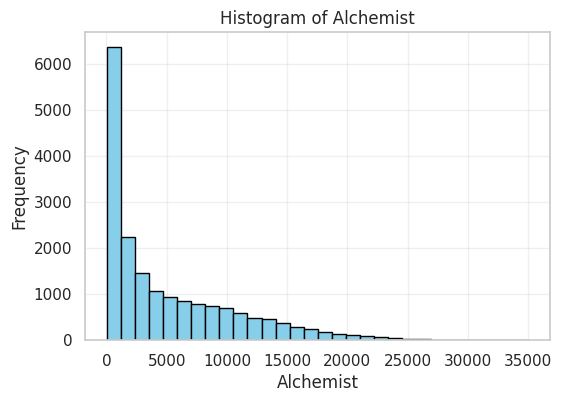

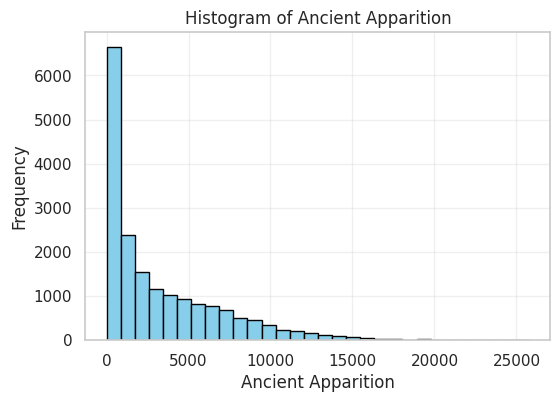

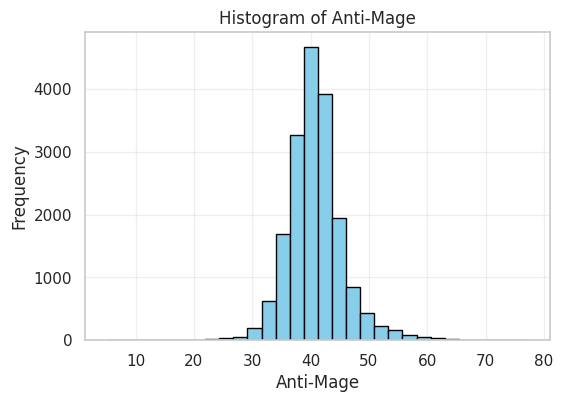

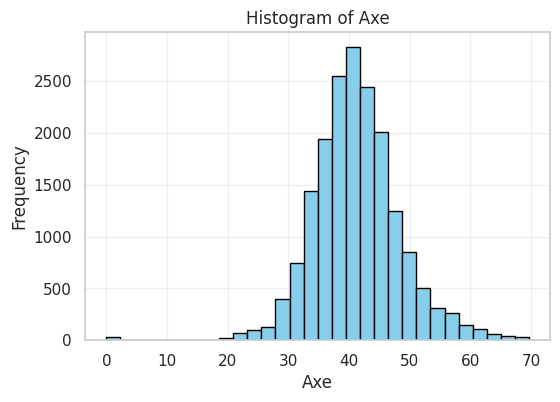

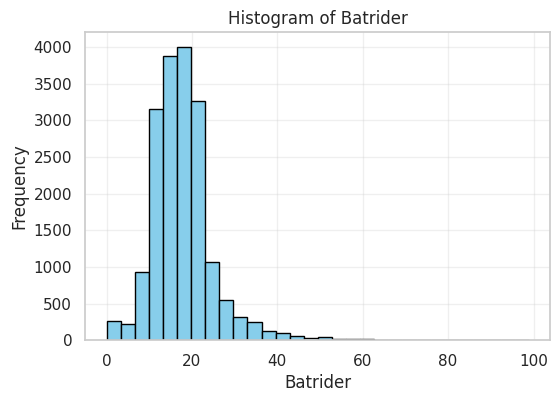

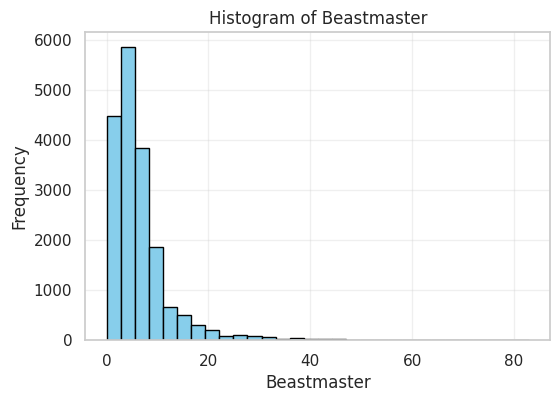

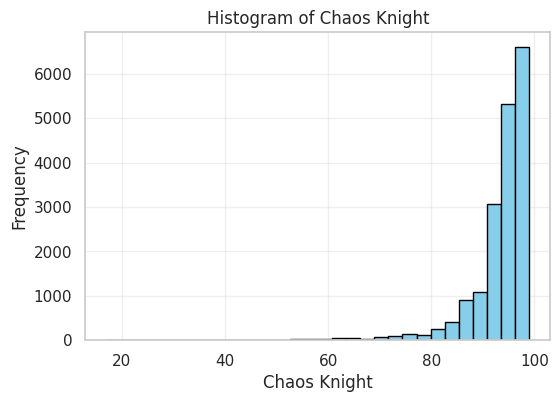

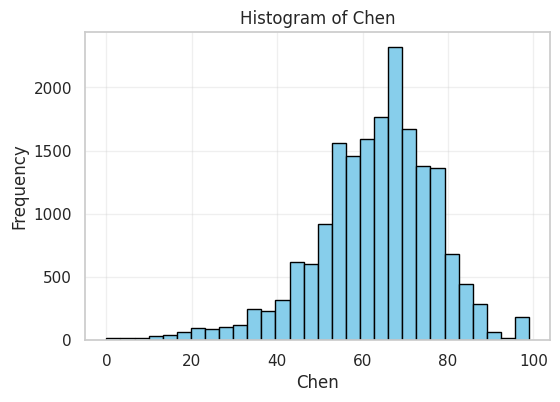

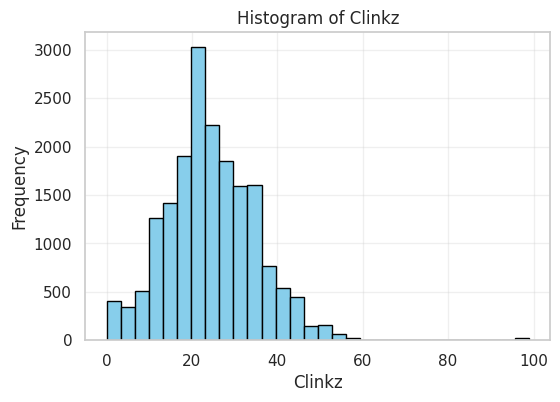

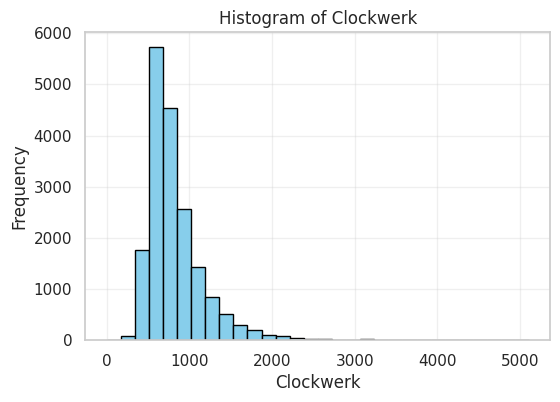

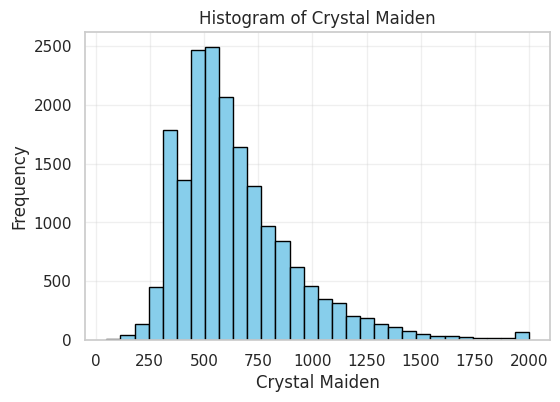

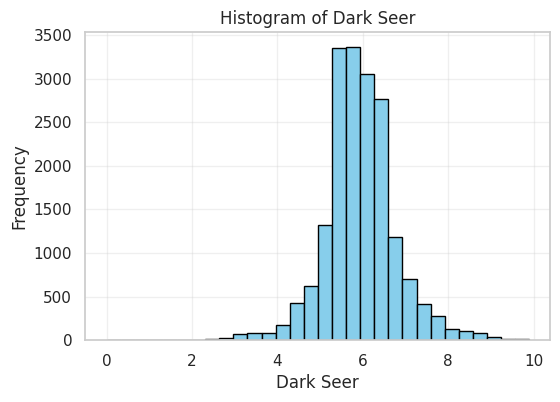

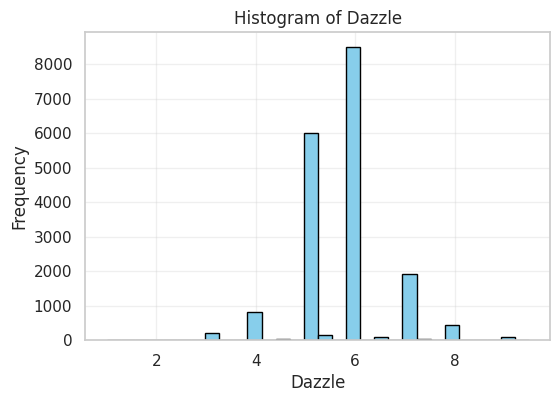

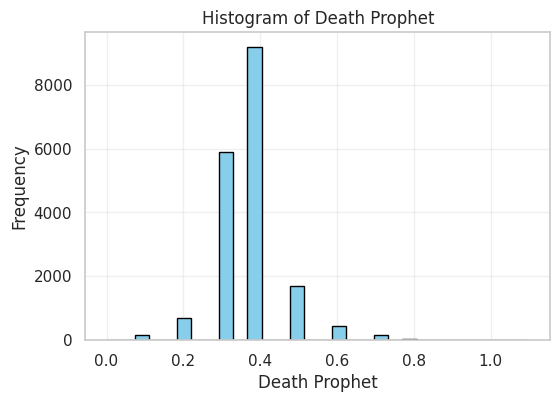

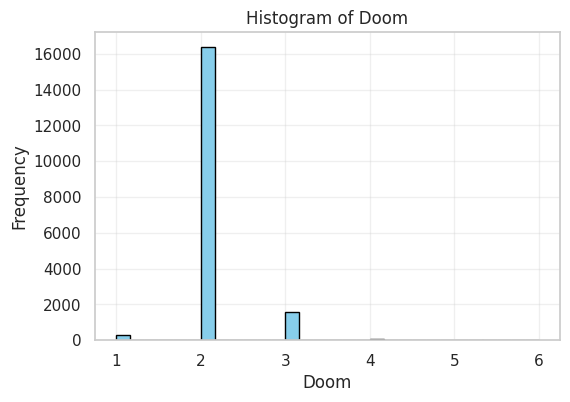

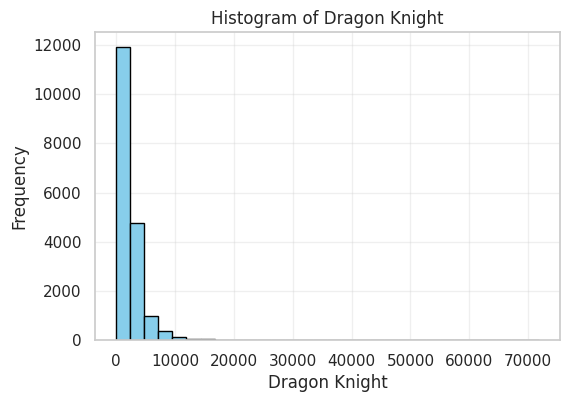

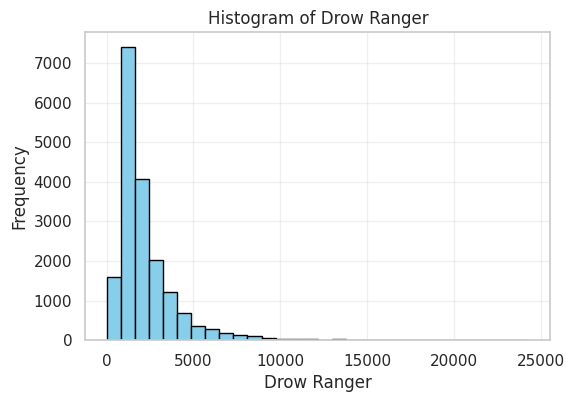

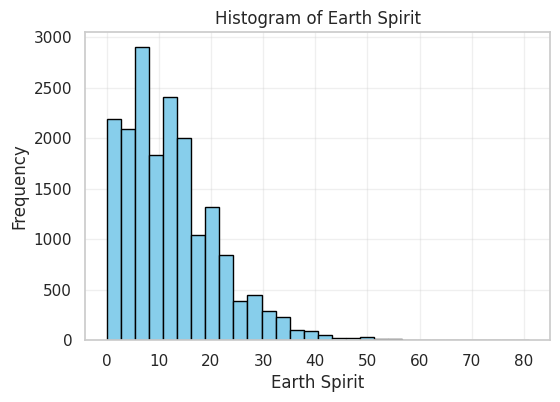

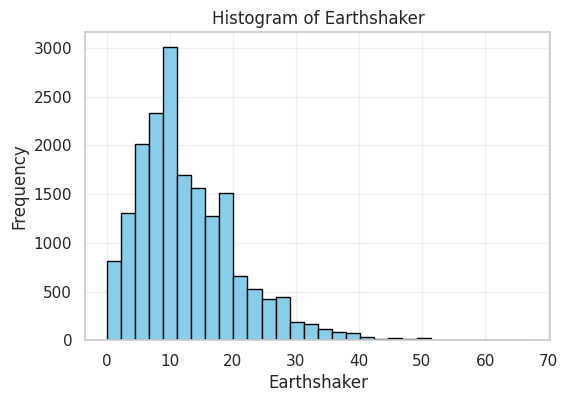

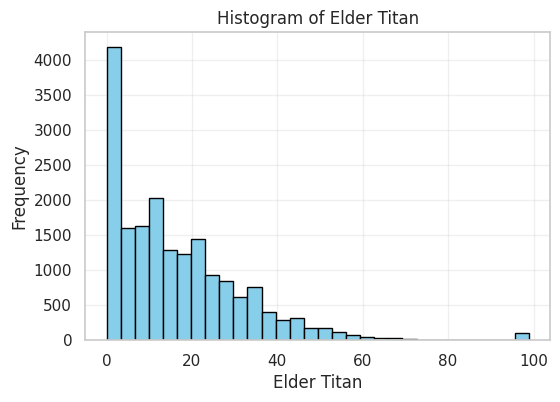

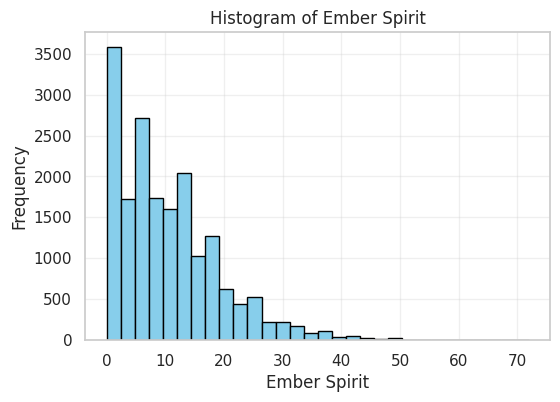

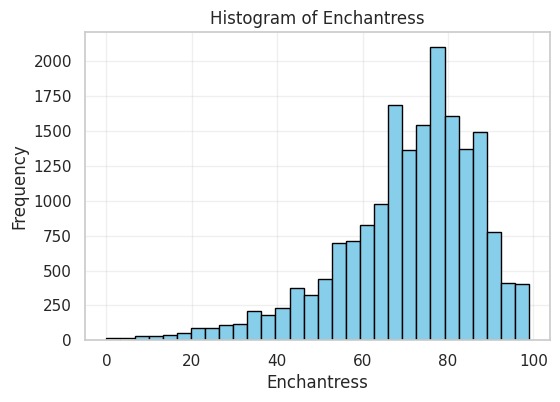

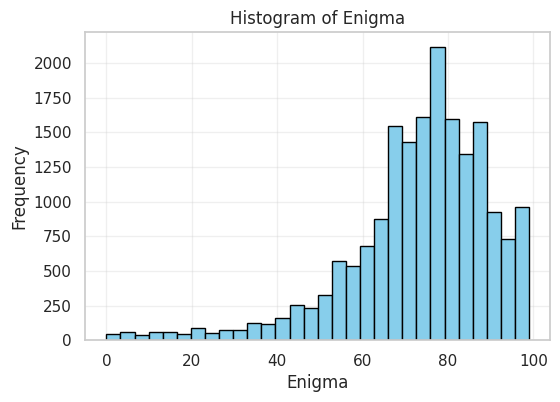

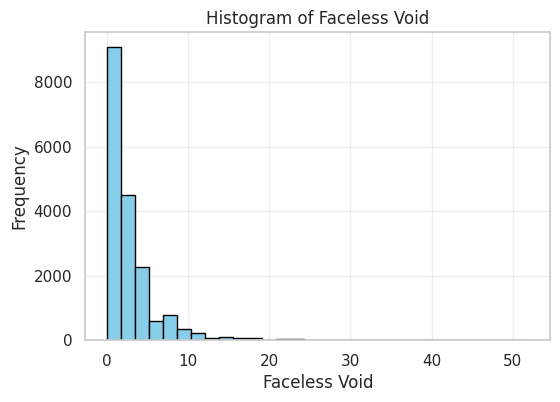

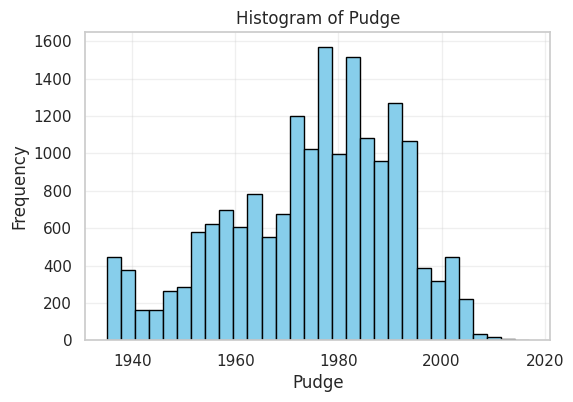

--- Histograms for Infutor enrichment Dataset ---


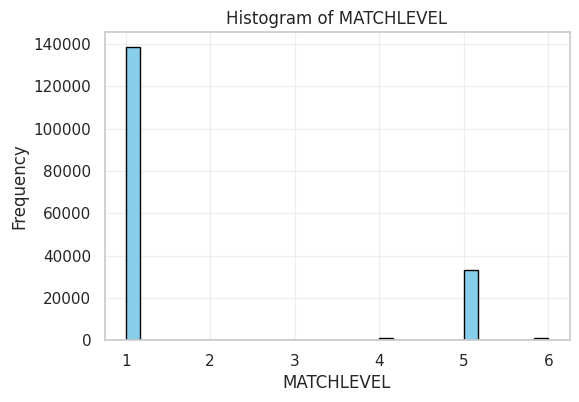

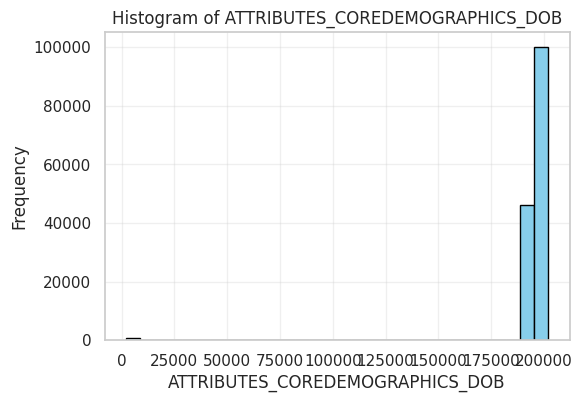

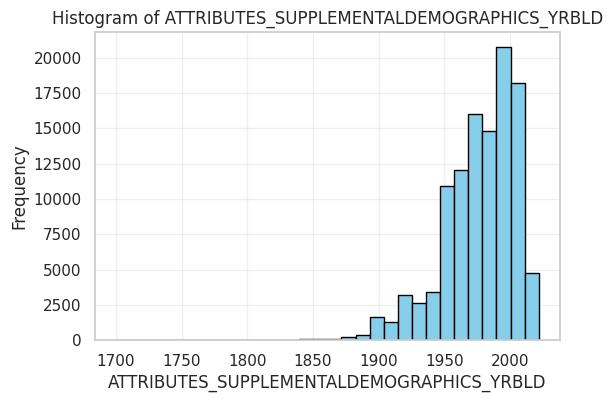

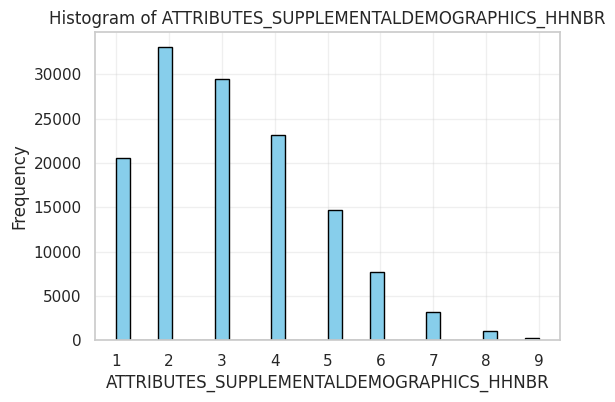

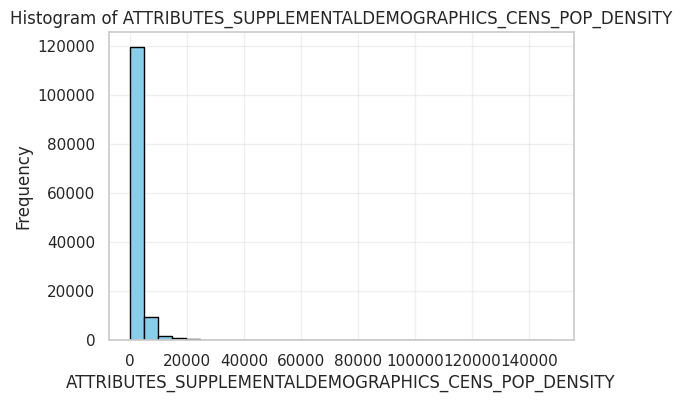

In [0]:
def plot_histograms(df, name):
    """
    Plots histograms for all numeric columns in a DataFrame.
    """
    print(f"--- Histograms for {name} Dataset ---")
    numeric_df = df.select_dtypes(include=[np.number])
    
    for col in numeric_df.columns:
        plt.figure(figsize=(6, 4))
        plt.hist(numeric_df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        plt.show()

# Plots histograms for all numeric columns      
plot_histograms(zip_code_df, "Zip code")
plot_histograms(infutor_enrichment_df, "Infutor enrichment")

In [0]:
def detect_categorical_outliers(df, threshold=0.01):
    """
    Identify rare categories in categorical columns based on frequency threshold.
    """
    outliers = {}

    categorical_cols = df.select_dtypes(include=['object', 'string', 'category']).columns

    for col in categorical_cols:
        value_counts = df[col].value_counts(normalize=True)
        rare_values = value_counts[value_counts < threshold].index.tolist()

        if rare_values:
            outliers[col] = rare_values

    return outliers

rare_cats = detect_categorical_outliers(leads_df, threshold=0.01)

for col, values in rare_cats.items():
    print(f"\n🧯 Rare categories in '{col}' (count: {len(values)}):")
    for val in values[:5]:  # Show only first 5 examples
        print(f"  - {val}")
    if len(values) > 5:
        print(f"  ... and {len(values) - 5} more")


🧯 Rare categories in 'HASHED_PHONE_NUMBER' (count: 276267):
  - 52dc1f49f405383db66d0f3f33a0dd6449d2e6de
  - cd2bab79e874cace82d4ba36e4c5a84bb76826bc
  - 6e317ac9c24576beaeb44321d4d85366114098c9
  - d1a2ada48a7171c10e963e6c6a69fe7331d6ba21
  - 45b4f5de0dd881af43281854825b7a9d129bca42
  ... and 276262 more

🧯 Rare categories in 'ZIP_CODE' (count: 18808):
  - 77449
  - 37042
  - 77494
  - 77084
  - 77373
  ... and 18803 more

🧯 Rare categories in 'CITY' (count: 9736):
  - Chicago
  - Columbus
  - Detroit
  - Cincinnati
  - Saint Louis
  ... and 9731 more

🧯 Rare categories in 'STATE' (count: 24):
  - OK
  - WV
  - MA
  - NY
  - OR
  ... and 19 more

🧯 Rare categories in 'COUNTY' (count: 1445):
  - Hamilton
  - Oakland
  - Davidson
  - Summit
  - Tarrant
  ... and 1440 more

🧯 Rare categories in 'EMAIL_DOMAIN' (count: 10076):
  - verizon.net
  - bellsouth.net
  - live.com
  - cox.net
  - me.com
  ... and 10071 more

🧯 Rare categories in 'OPERATINGSYSTEMCLASS' (count: 2):
  - Embedded
  -

## 8. Exploratory data analysis

1. Target Variable Analysis
2. Numerical Features Analysis
3. Categorical Features Analysis
4. Feature Interactions

#### 8.1 Target Variable Analysis

Examines the distribution of the target variable by displaying counts and percentages for each class. A bar plot visualizes the class balance to identify potential imbalances.

The target variable IS_APPOINTMENT_SET is imbalanced, with 83% False and 17% True.

This imbalance may impact model performance and should be accounted for during training using techniques such as class weighting or resampling.


--- Target Variable Analysis: IS_APPOINTMENT_SET ---
        Count Percentage
False  236321     83.00%
True    48387     17.00%


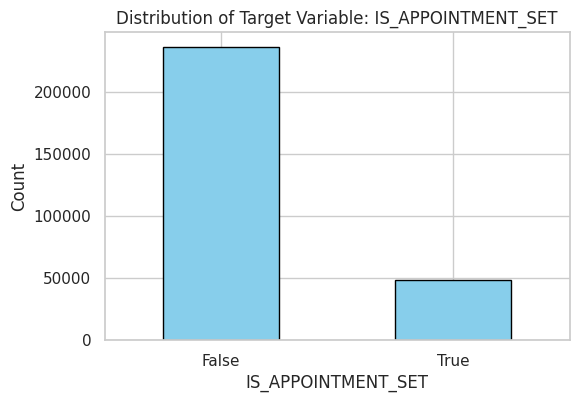

In [0]:
def analyze_target_variable(df, target_col):
    """
    Analyzes the target variable distribution.
    
    """
    print(f"--- Target Variable Analysis: {target_col} ---")
    
    # Value counts and percentages
    counts = df[target_col].value_counts()
    percentages = df[target_col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.map("{:.2f}%".format)})
    
    print(summary)
    
    # Plot distribution
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Target Variable: {target_col}')
    plt.xlabel(target_col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

# Analyze the target variable distribution
analyze_target_variable(leads_df, 'IS_APPOINTMENT_SET')

#### 8.2 Correlation Analysis

Analyzes pairwise correlations between numerical features to detect multicollinearity and understand linear relationships that may influence model behavior.

A correlation heatmap is plotted using Pearson's method, helping identify redundant features and guiding potential feature reduction or transformation strategies in zip codes dataset.

Features with a high correlation coefficient (above 0.8) will be considered for removal in the next step to reduce redundancy and improve model generalization.


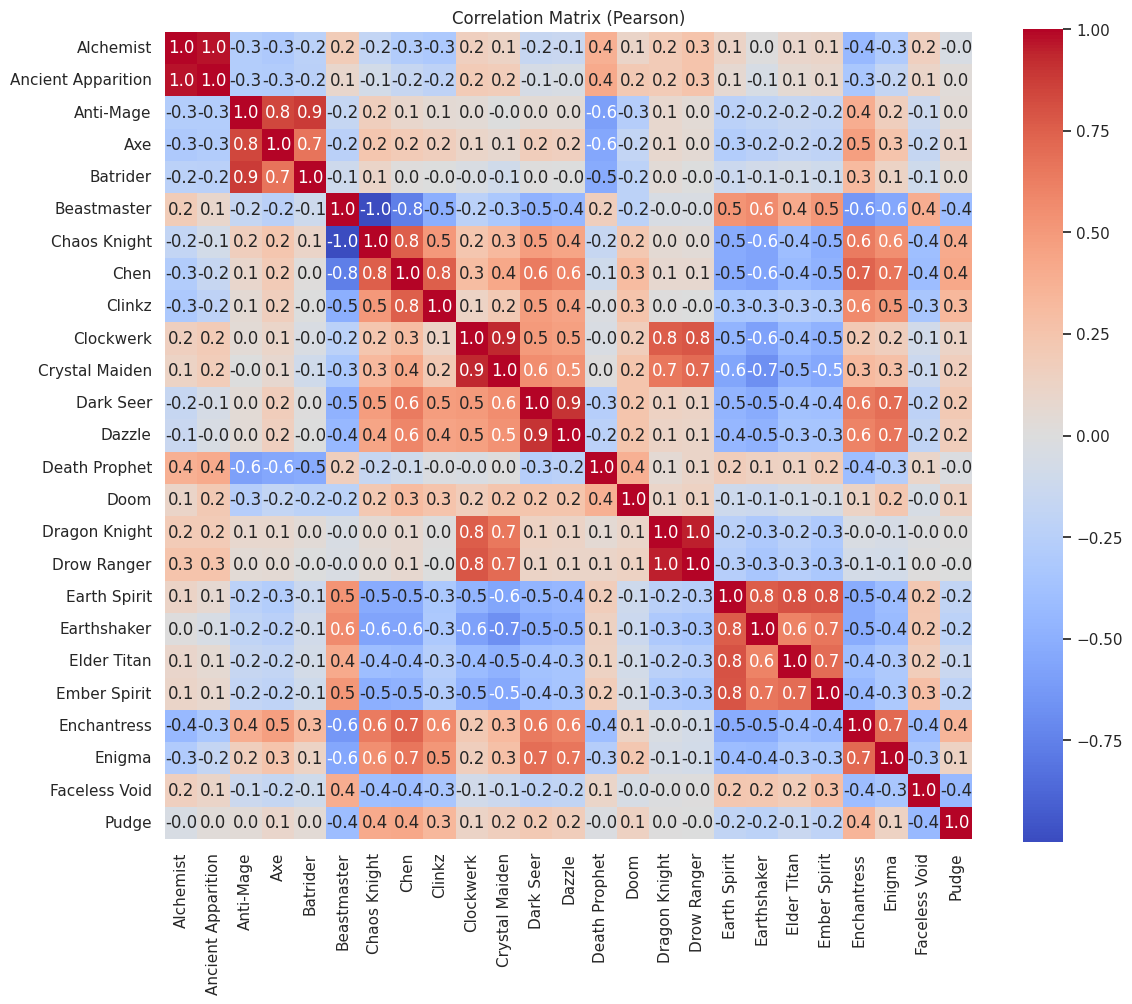

In [0]:
def correlation_analysis(df, figsize=(12, 10), corr_method='pearson', annot=True, cmap="coolwarm"):
    """
    Performs correlation analysis on numerical features of a DataFrame.
    """
    # Select numeric columns
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    # Calculate correlation matrix
    corr_matrix = df[num_cols].corr(method=corr_method)
    
    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=annot, fmt=".1f", cmap=cmap, square=True)
    plt.title(f"Correlation Matrix ({corr_method.capitalize()})")
    plt.tight_layout()
    plt.show()

# perform correlation analysis on the zip_code dataset
correlation_analysis(zip_code_df)

### 8.3 Categorical Variables Distribution

Explores the distribution of categorical features to identify dominant categories, potential imbalance, and high-cardinality.

For each categorical column:
- Printed value counts and total number of unique categories
- Plotted bar charts for columns with fewer than 20 unique values



📊 Value Counts for 'HASHED_PHONE_NUMBER':
52dc1f49f405383db66d0f3f33a0dd6449d2e6de    800
cd2bab79e874cace82d4ba36e4c5a84bb76826bc    226
6e317ac9c24576beaeb44321d4d85366114098c9    167
d1a2ada48a7171c10e963e6c6a69fe7331d6ba21     96
45b4f5de0dd881af43281854825b7a9d129bca42     76
3a9889e73686ee042b9e68350d7ca39e11ef75d6     40
62d695be599c9eb5a8c29da1892b08fe4c093c3c     33
7f358e99372f4399a8331ae2b3a23d55c1f5c270     32
f19b9a223cc10a331dcb62258fe039139f3063a0     26
eff6f1f861f2a72beed6d440a27c7198583f59bb     22
a36adce78cdd5e70d7e4f3052b741ea98ab13779     18
c7197ea215ff0fe7d14a49a7c521c9d97c099793     17
194eebf33fbe60775a017253bed858df08165699     15
95d0d0f1e8b1ddd59063cc8936a565924c80d895     14
0c0a66bb80c9daebb044b33939278bfad2baea23     12
a6c5c0a79b24ce61eea2c3a01dce4e2c1ebb87a1     12
9826e9bb655ed1ac1edf2c11d625031e412f9a22     11
92986e5684860fbb4a55193096a9bbef52306253     10
435de6e22bb9169e6479288a559d14cc218bb8a0     10
3ad3a942e683038d0c719dfec630c3ea1b035b88     

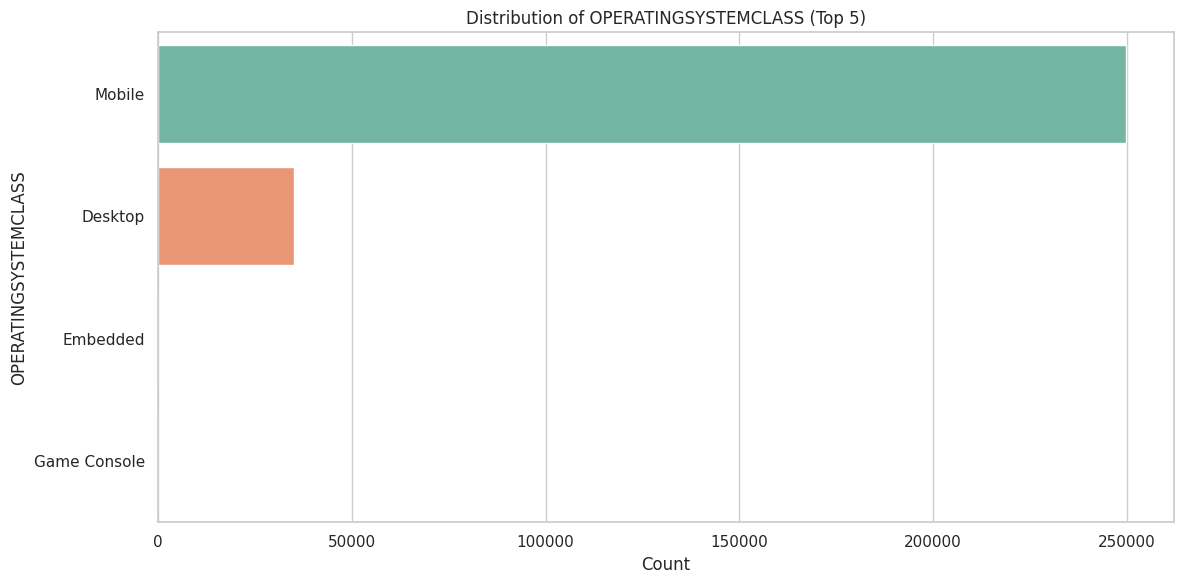


📊 Value Counts for 'OPERATINGSYSTEMNAME':
iOS           151802
Android        96018
Windows NT     25086
Mac OS          8659
FireOS          1826
Chrome OS       1100
Linux            184
Ubuntu            16
<NA>              14
Tizen              2
Orbis OS           1
Name: OPERATINGSYSTEMNAME, dtype: Int64
Number of unique values: 11


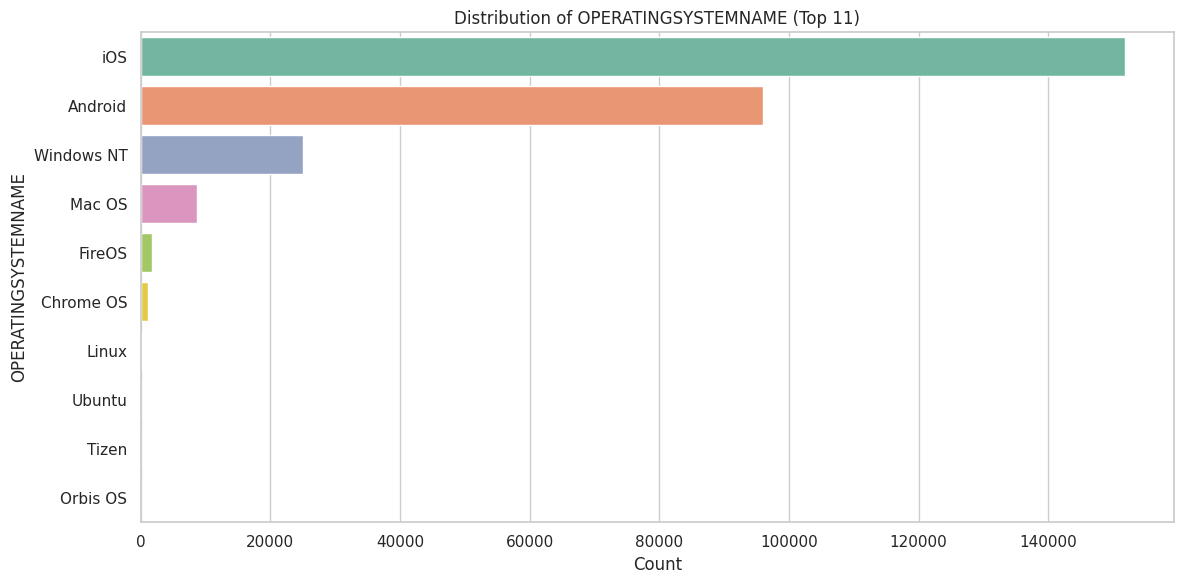


📊 Value Counts for 'AGENTNAME':
UIWebView                  89519
Chrome Webview             67660
Chrome                     42642
Safari                     41604
Instagram                  16080
Edge                       10929
SamsungBrowser              3699
Firefox                     2567
Silk                         787
musical_ly_25.9.0 JsSdk      402
musical_ly_28.2.0 JsSdk      356
musical_ly_26.3.0 JsSdk      351
DuckDuckGo                   294
musical_ly_26.4.2 JsSdk      287
musical_ly_25.3.0 JsSdk      273
musical_ly_23.7.0 JsSdk      269
musical_ly_28.4.0 JsSdk      257
musical_ly_24.1.0 JsSdk      253
GannettNativeWebView         240
musical_ly_26.6.1 JsSdk      227
musical_ly_25.1.1 JsSdk      168
musical_ly_25.7.1 JsSdk      158
musical_ly_30.2.0 JsSdk      152
musical_ly_26.2.0 JsSdk      150
musical_ly_24.5.0 JsSdk      148
musical_ly_25.8.0 JsSdk      147
musical_ly_26.5.0 JsSdk      135
QuantcastSDK                 135
musical_ly_23.5.0 JsSdk      135
ADG       

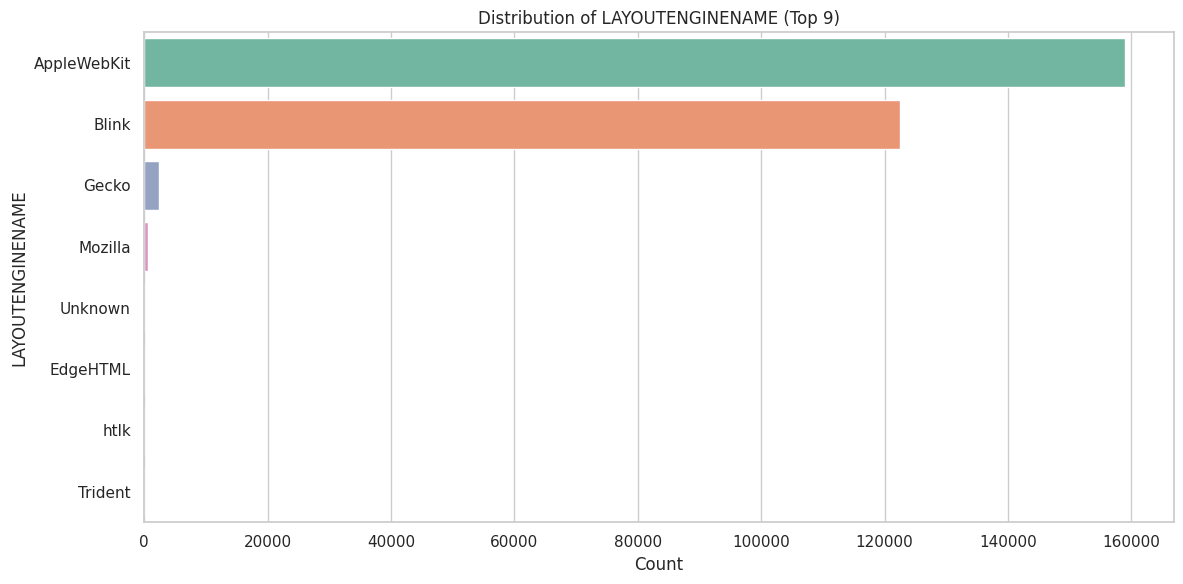


📊 Value Counts for 'NETWORKTYPE':
Unknown    274510
Wifi         8034
4G            917
2G            683
Mobile        547
<NA>           14
3G              2
Channel         1
Name: NETWORKTYPE, dtype: Int64
Number of unique values: 8


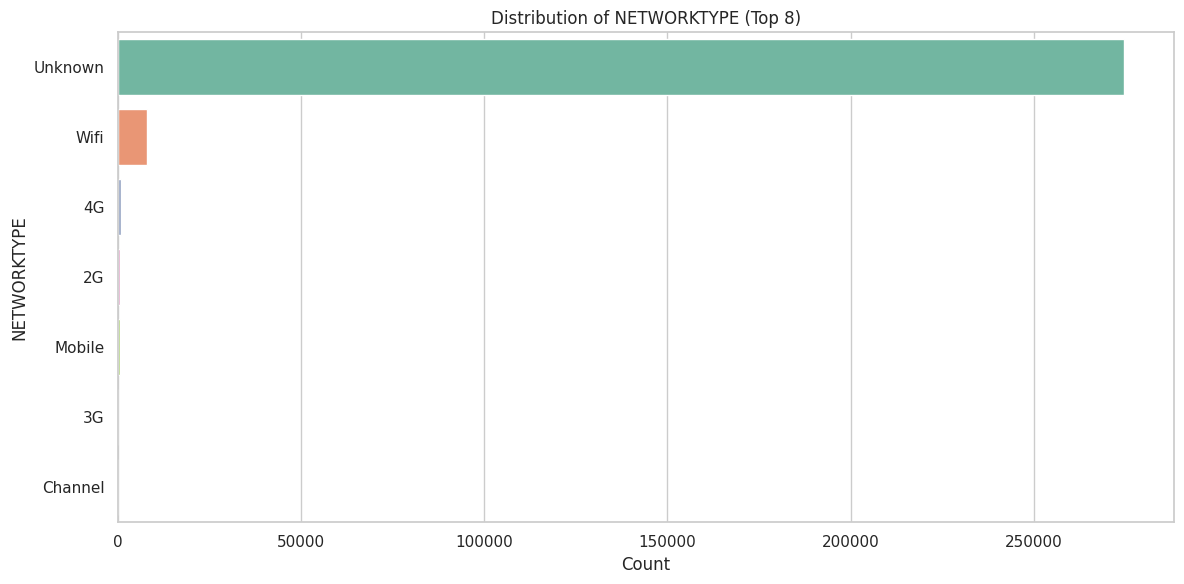


📊 Value Counts for 'OPERATINGSYSTEMVERSIONMAJOR':
16         80099
15         62258
12         32967
13         24608
??         16883
11         14899
>=10       14663
10          9572
9           6097
14          5709
>=10.15     5513
10.15       2557
8           2251
7           2128
17          2064
5            505
10.13        246
103          178
6            167
10.14        160
10.12         87
108           77
114           69
100           64
99            63
105           59
116           53
93            51
4             49
101           44
115           42
10.11         41
10.10         33
98            33
112           33
104           31
107           30
102           29
111           28
110           27
117           25
97            22
109           19
10.9          17
76            17
106           17
113           15
<NA>          14
Vista         11
91             9
92             9
77             9
XP             7
96             7
75             6
88            

In [0]:
def plot_categorical_distributions(df, max_unique=20, figsize=(12, 6)):
    """
    For each categorical column in the dataframe:
    - Print value counts
    - Plot bar chart of the distribution (if number of unique values < max_unique)
    """
    categorical_cols = df.select_dtypes(include=['object', 'string', 'category']).columns

    for col in categorical_cols:
        print(f"\n📊 Value Counts for '{col}':")
        print(df[col].value_counts(dropna=False))

        unique_vals = df[col].nunique(dropna=False)
        print(f"Number of unique values: {unique_vals}")

        if unique_vals <= max_unique:
            plt.figure(figsize=figsize)
            sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='Set2')
            plt.title(f"Distribution of {col} (Top {unique_vals})")
            plt.xlabel("Count")
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()
        else:
            print(f"🔍 Skipping plot for '{col}' (too many unique values: {unique_vals})")


# Analyze categorical variables in leads_df
plot_categorical_distributions(leads_df)


## 9. Summary

Key observations include:

- **Target Variable Imbalance**  
  The target variable `IS_APPOINTMENT_SET` is imbalanced, with the positive class representing only ~17% of observations. This indicates the need to consider resampling techniques or evaluation metrics (like ROC AUC) that are robust to imbalance.

- **Missing values**
  Missing values in the Infutor enrichment dataset will be re-evaluated after merging with the main dataset to assess their impact in the combined data context.


- **Numerical Feature Distributions**  
  Z-score analysis flagged outliers in several numeric features, mostly falling within ~1–3% of the data.  
  - Given the planned use of tree-based models, which are generally robust to outliers, no removal or imputation is planned.

- **Categorical Variables**  
  Frequency plots reveal that several categorical features exhibit high cardinality or contain rare categories (frequency < 1%). Identified rare categories will be addressed in the subsequent step.

- **Correlation Between Features**  
  Pearson correlation analysis highlighted several pairs of highly correlated numeric features. To reduce redundancy and mitigate multicollinearity in tree-based models, features with correlation above 0.8 will be removed in the next step.
